# Demo Use for Retinopathy detection

### Import libraries

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing import image
from PIL import Image

###  Normalization function

In [44]:
img_height = 512
img_width = 512

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

def load_and_prepare_image(file_path):
    # Load the image
    img = image.load_img(file_path, target_size=(img_height, img_width))
    # Convert the image to a numpy array
    img = image.img_to_array(img)
    # Normalize the image (scale pixel values to [0, 1])
    img = normalization_layer(img)
    # Add a batch dimension
    img = np.expand_dims(img, axis=0)
    return img
   

### Load pre-trained model

In [45]:
model_dir = '/Model.h5'
model = tf.keras.models.load_model(model_dir)

### Load photos to be tested on

In [46]:
img_path = [
    "image_test/0001_0_left.jpg",
    "image_test/0632_1_left.jpg",
    "image_test/0656_2_left.jpg",
    "image_test/1038_3_left.jpg",
    "image_test/0748_4_left.jpg",
    "image_test/1180_5_left.jpg"
]
input_image = []

for path in img_path:
    images = load_and_prepare_image(path)  # Load and prepare each image
    input_image.append(images)

### Show images

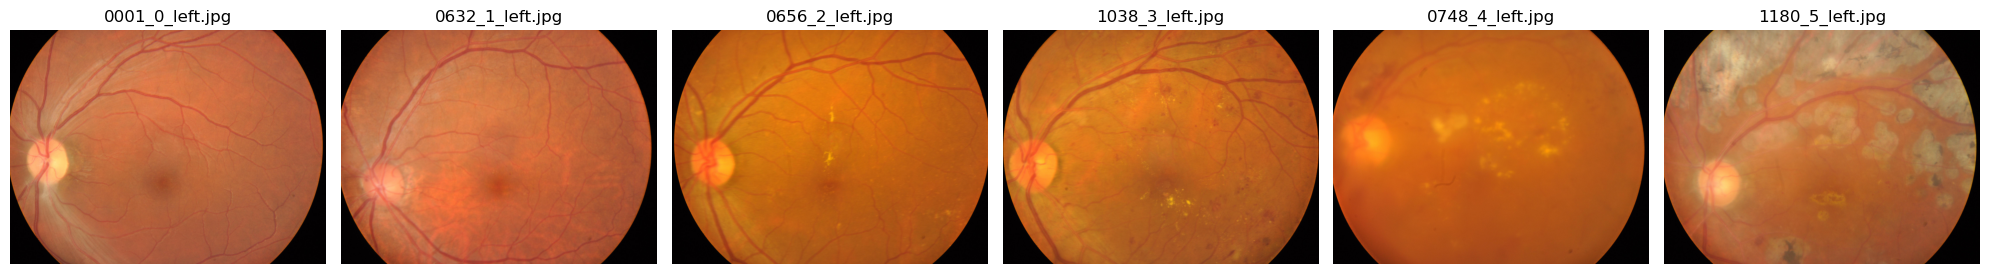

In [47]:
num_images = len(img_path)

plt.figure(figsize=(20, 5)) # Create a figure with a horizontal layout

for i in range(len(img_path)):
    image = Image.open(img_path[i])  # Load the image

    # Display the image
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns, i+1 is the current subplot
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers

    # Add a title to the image based on its file name
    plt.title(img_path[i].split("/")[-1])

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()

### Make predictions:

In [48]:
for i in range(len(img_path)):
    print("Testing the image: ", img_path[i])  # Print the current image path
    
    # Predict the class
    prediction = model.predict(input_image[i])
    
    # Calculate probabilities and predicted class
    predicted_class_index = tf.nn.softmax(prediction)
    probabilities = tf.nn.softmax(predicted_class_index).numpy()
    predicted_class = np.argmax(probabilities, axis=1)
    
    print("Probabilities:", probabilities)
    print("Predicted class:", predicted_class, "\n")

Testing the image:  image_test/0001_0_left.jpg


1/1 [==============================] - 1s 592ms/step
Probabilities: [[0.19969034 0.16012463 0.16005309 0.160044   0.16004401 0.16004398]]
Predicted class: [0] 

Testing the image:  image_test/0632_1_left.jpg
1/1 [==============================] - 0s 20ms/step
Probabilities: [[0.19971642 0.16008525 0.16007571 0.16004084 0.16004092 0.16004084]]
Predicted class: [0] 

Testing the image:  image_test/0656_2_left.jpg
1/1 [==============================] - 0s 17ms/step
Probabilities: [[0.1652076  0.16150413 0.18974611 0.16113298 0.16127013 0.1611391 ]]
Predicted class: [2] 

Testing the image:  image_test/1038_3_left.jpg
1/1 [==============================] - 0s 16ms/step
Probabilities: [[0.16208044 0.16209283 0.17392932 0.17248294 0.16392231 0.16549219]]
Predicted class: [2] 

Testing the image:  image_test/0748_4_left.jpg
1/1 [==============================] - 0s 16ms/step
Probabilities: [[0.16170385 0.16161898 0.18403763 0.16170847 0.16528788 0.16564314]]
Predicted class: [2] 

Testing the